<div class="alert alert-success">
<font color='black'>    
<br><b>Цели исследования:</b>
<br>- Приоритизировать гипотезы для увеличения выручки крупного интернет-магазина из подготовленного с отделом маркетинга списка.
<br>- Запустить A/B-тест.
<br>- Проанализировать результаты.
    </font>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 400)
import datetime as dt

### Часть 1. Приоритизация гипотез.

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### Фреймворк ICE

In [6]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

display((hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)).round(2))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


#### Фреймворк RICE

In [7]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div class="alert alert-success">
<font color='black'>    
<br><b>Вывод:</b>
<br><b>По фреймворку ICE наиболее приоритетными были гипотезы:</b>
<br>1)Запустить акцию, дающую скидку на товар в день рождения
<br>2)Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
<br>3)Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
<br><b>По фреймворку RICE наиболее приоритетные гипотезы расположились следующим образом:</b>
<br>1)Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
<br>2)Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
<br>3)Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    
<br>Хорошо заметно различие в обеих таблицах. Главное меняется тройка лидеров, это отличие обусловлено, тем что в фреймворке RICE мы учитываем важный параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в лидеры вышли гипотезы с наибольшим охватом пользователей.<b></font></div>

### Часть 2. Анализ A/B-теста

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
orders.columns = orders.columns.str.lower()
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [43]:
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)#cравним идентичны ли даты и группы в таблицах посетителей и заказов

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [11]:
compare_dg = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == \
                        visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
compare_dg

,date,group
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
57,True,True
58,True,True
59,True,True
60,True,True


In [42]:
compare_dg['date'].sum() , compare_dg['group'].sum()

(62, 62)

Пары дата-группа в таблицах посетители и заказы совпадают

In [52]:
g_a = orders[orders['group']=='A']['visitorid']#проверим группыы на совпадение пользователей
g_b = orders[orders['group']=='B']['visitorid']
orders_ab = orders.query('visitorid in @g_a and visitorid in @g_b')
print('Количество пользователей в двух группах:', orders_ab['visitorid'].nunique())
print('Всего пользователей в тесте:', orders['visitorid'].nunique())

Количество пользователей в двух группах: 58
Всего пользователей в тесте: 1031


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
orders.duplicated().sum()

0

In [15]:
orders.isnull().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
visitors.duplicated().sum()

0

In [19]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

<div class="alert alert-success">
<font color='black'>    
<br><b>Все данные корректны, дубликатов и пропусков в данных нет, заменил тип данных "date" на datetime</b>

In [20]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# Получим строки orders, дата которых <= дате элемента из datesGroups, а группа теста равна группе из datesGroups
# Агрегируем значения, найдём число уникальных ID заказов и пользователей
# Подсчитаем сумму средних чеков

ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
)

# Получим нужные строки visitors, агрегируем значения
# Посчитаем количество пользователей

visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cummulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


#### График кумулятивной выручки по группам

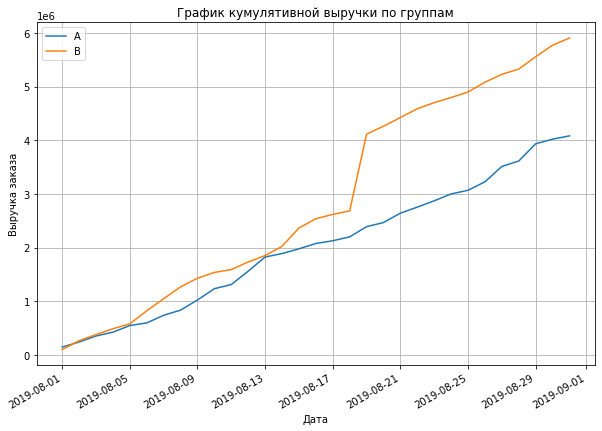

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и B
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]


cummulativeRevenueA['date'] = pd.to_datetime(cummulativeRevenueA['date'], format='%Y-%m-%d')
cummulativeRevenueB['date'] = pd.to_datetime(cummulativeRevenueB['date'], format='%Y-%m-%d')


# Строим график выручки группы А и B

fig = plt.figure(figsize=[10,7])
plt.grid(True)

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

fig.autofmt_xdate()
plt.title('График кумулятивной выручки по группам')
plt.xlabel("Дата")
plt.ylabel("Выручка заказа")
plt.legend()
plt.show()

<div class="alert alert-success">
<font color='black'>    
<br><b>Выручка в обеих группах растёт, но в группе B выручка выше практически на протяжении всего месяца. Также в этой группе наблюдается сильный скачок с 18 на 19 число, что может быть следствием всплеска числа заказов, или же о появлении очень дорогих заказов в выборке.</b>

#### График кумулятивного среднего чека по группам

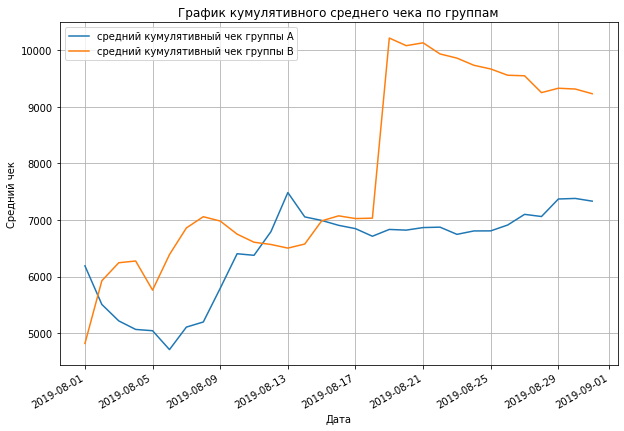

In [22]:
fig = plt.figure(figsize=[10,7])
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
fig.autofmt_xdate()
plt.legend()
plt.grid(True)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.show()

<div class="alert alert-success">
<font color='black'>    
<br><b>Средний чек стабилизируется к концу теста: немного растет для группы A и и продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике).</b>

#### График относительного изменения кумулятивного среднего чека группы B к группе A. 

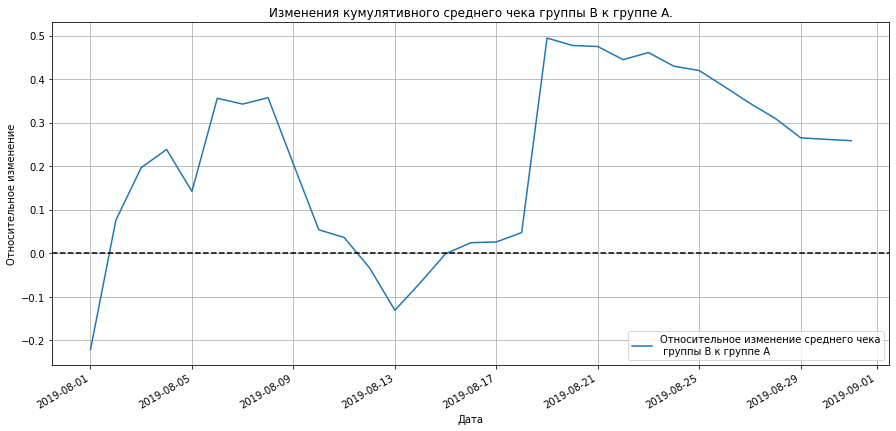

In [23]:
 fig = plt.figure(figsize=[15,7])
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1, label="Относительное изменение среднего чека\n группы B к группе A")
plt.legend(loc='lower right')
fig.autofmt_xdate()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.title('Изменения кумулятивного среднего чека группы B к группе A.')
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")
plt.show()

<div class="alert alert-success">
<font color='black'>    
<br><b>График различия между сегментами валатилен. Сначала средний чек группы B растет, затем резко падает и далее взлетает. Возможно это влияние крупных заказов и выбросов. В целом все три графика демонстрируют одинаковую картину.</b>

#### График кумулятивного среднего количества заказов на посетителя по группам

In [24]:
# считаем кумулятивное среднее количества заказов
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
print(cummulativeData['conversion'].min())
print(cummulativeData['conversion'].max())

0.029217427214536445
0.03685636856368564


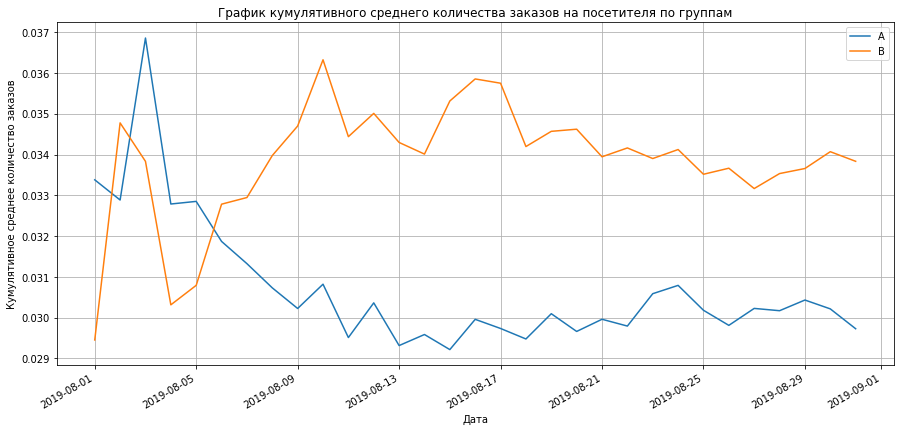

In [25]:
cummulativeData['date'] = pd.to_datetime(cummulativeData['date'], format='%Y-%m-%d')

# отделяем данные по группе A и B
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']


# строим графики
fig = plt.figure(figsize=[15,7])
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
fig.autofmt_xdate()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel("Дата")
plt.ylabel("Кумулятивное среднее количество заказов")
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-success">
<font color='black'>    
<br><b>Группы колебались около одного значения, но затем кумулятивное среднее количество заказов  группы B вырвалось вперёд и зафиксировалась, а кумулятивное среднее количество заказов группы A просела и также зафиксировалась.</b>

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

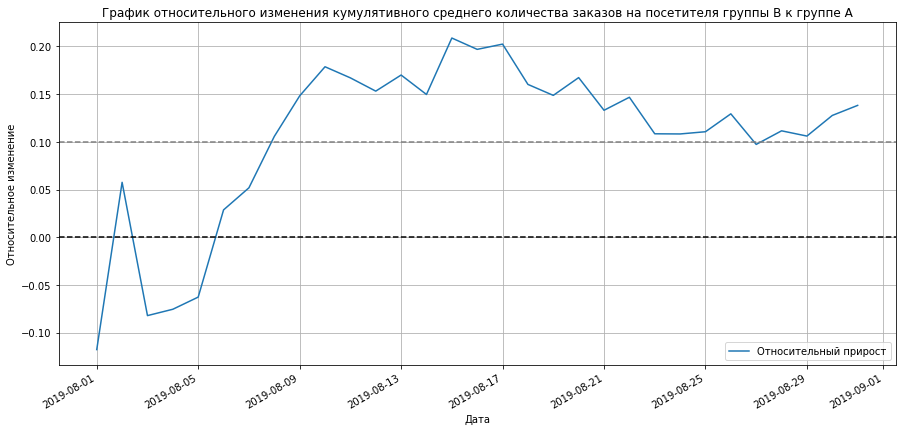

In [26]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure(figsize=[15,7])
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительный прирост")
plt.legend(loc="lower right")
fig.autofmt_xdate()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")
plt.show()

<div class="alert alert-success">
<font color='black'>    
<br><b>Со старта группа B лидирует по относительному изменению кумулятивного среднего количества заказов: прирост сначала колебался от 15% до 20% к концу месяца в районе 10-15%.</b>

#### Точечный график количества заказов по пользователям.

In [27]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})

ordersByUsers.columns = ['visitorid','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

       visitorid  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


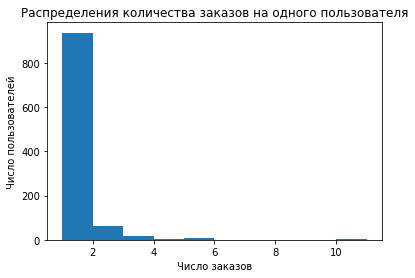

In [28]:
plt.hist(ordersByUsers['orders'])#Построим гистрограмму распределения количества заказов на одного пользователя.
plt.title('Распределения количества заказов на одного пользователя')
plt.ylabel("Число пользователей")
plt.xlabel("Число заказов")
plt.show()

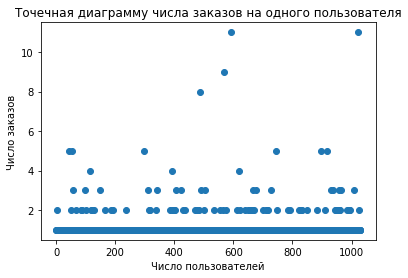

In [29]:
x_values = pd.Series(range(0,len(ordersByUsers)))#Построим точечную диаграмму числа заказов на одного пользователя

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмму числа заказов на одного пользователя')
plt.xlabel("Число пользователей")
plt.ylabel("Число заказов")
plt.show()

<div class="alert alert-success">
<font color='black'>    
<br><b>Анализируя граффики можно сделать вывод, что большинство покупателей заказывали только один раз. Однако доля пользователей с 2-5 заказами тоже значительна. </b>

#### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных заказов.

In [30]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

<div class="alert alert-success">
<font color='black'>    
<br><b> Порядка 5% пользователей оформляли больше чем 2 заказа и 1% пользователей заказывали больше 4-х раз.
Предполагаю, что можно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.</b>

#### Точечный график стоимостей заказов

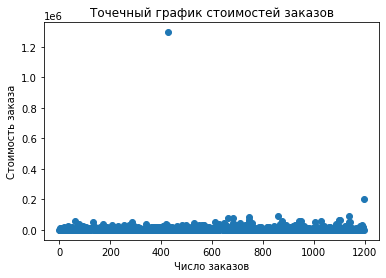

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel("Число заказов")
plt.ylabel("Стоимость заказа")
plt.show()

<div class="alert alert-success">
<font color='black'>    
<br><b> Практически все стоимости заказов находятся в пределах 100000, но есть выбросы со стоимостями более миллиона. Именно этот заказ отразился на всех графиках.</b>

#### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [32]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

<div class="alert alert-success">
<font color='black'>    
<br><b> 1% заказов дороже 58 234 рублей, не более 5% заказов дороже 28 000 рублей, можно взять эту цифру за границу для определения аномальных заказов.</b>

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [33]:
# Считаем количество пользователей до выбранной даты включительно в группах A и B;

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Считаем суммарное число заказов до выбранной даты включительно в группах A и B
ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


# Получаем таблицу с количеством заказов, выручкой в день, количество заказов и выручка до выбранной даты(включительно)
# Количество пользователей до выбранной даты 
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


<div class="alert alert-success">
<font color='black'>    
<br><b> Нулевая гипотеза - Cтатистически значимых различий в средним количеством заказов на посетителя между группами нет
<br>Альтернативная - есть статистически значимые различия в средним количеством заказов на посетителя между группами
<br>Статистичиский критерий - 0,05
<br>Применяем метод непараметрический теста Уилкоксона-Манна-Уитни к нему прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрических результатов.</b>

In [34]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Подготовим выборки к проверке критерием Манна-Уитни. Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [35]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем относительный прирост в среднем количестве заказов на посетителя группы B: прирост в среднем количестве заказов группы B / прирост в среднем количестве заказов группы A - 1. Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [36]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов между группами нет".')
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.017
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов между группами нет".
Относительный показатель 'B' и 'A' = 0.138


<div class="alert alert-success">
<font color='black'>    
<br><b>P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов на посетителя между группами  есть статистически значимые различия. Относительный прирост среднего количества заказов группы B к среднему количеству заказов группы A равен 13,8 %.</b>

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [37]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')

print("Относительный прирост в среднем чеке группы B: {0:.3f}"
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение: 0.729
Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".
Относительный прирост в среднем чеке группы B: 0.259


<div class="alert alert-success">
<font color='black'>    
<br><b>P-value значительно больше 0.05. Значит, нельзя отвегнуть нулевую гипотезу. В среднем чеке заказа между группами различий нет. Средний чек группы B почти на 26% выше среднего чека группы A.</b>

####  Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

За аномальных пользователей были приняты те, кто совершил от 3 заказов или совершил заказ дороже 28000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape()

In [69]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей: {}".format(format(abnormalUsers.shape)))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Всего аномальных пользователей: (74,)


Всего 74 аномальных пользователя. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [79]:
print("Относительные потери составили: {:.3f}%".format((abnormalUsers.nunique()/orders['visitorid'].nunique())*100))

Относительные потери составили: 7.177%


In [39]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [40]:
#print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами A и B" нет.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами A и B" нет.')
print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.016
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами A и B" нет.
Относительный прирост конверсии группы B: 0.168


<div class="alert alert-success">
<font color='black'>    
<br><b>Результаты практически не изменились. p-value остался значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группамистатистически значимые различия в среднем количестве заказов на посетителя между группами A и B нет  - отвергаем.
По очищенным данным есть . Относительный прирост среднего количества заказов группы B около 17%</b>

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [41]:
results = stats.mannwhitneyu(orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')

print("Относительный прирост в среднем чеке группы B: {0:.3f}"
      .format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-значение: 0.738
Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".
Относительный прирост в среднем чеке группы B: -0.020


<div class="alert alert-success">
<font color='black'>    
<br><b>P-value практически не изменился. Очищенные данные показывают, что средний чек группы B немного уступает группе A, хотя на сырых данных чек группы B был на 26% больше.
По очищенным данным статистически значимых различий среднего чека между группами нет, но разница из положительной стала отрицательной - это показывает вклад аномалии.</b>

<div class="alert alert-success">
<font color='black'>    
<br><b>На основании проведенного исследования можно сделать вывод:</b>
    <br>Есть статистически значимое различие в среднем количестве заказов на посетителя между группами как по "сырым данным", так и после фильтрации аномалий.
Как по сырым, так и по очищенным данным нет статистически значимого различия по среднему чеку между группами.
<br>График различия  в среднем количестве заказов на посетителя сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту и практически зафиксировались.
<br><b>На основании результатов, можно остановить тест и зафиксировать победу группы B. Так как есть статистически значимое различие  по среднему количестве заказов на посетителя между группами, относительный прирост конверсии группы B около 17%.</b>